# Basic noise metric tests

Some of the noise metrics don't seem quite right but it's a bit too complicated to get my head around so I have created some basic images that I can use as an example to test it.

In [1]:
import algo_test as at
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import cv2

In [2]:
original_L_file = '/home/advai-admin-root/projects/ocr_lib/images/original_L.png'
L_noise_file = '/home/advai-admin-root/projects/ocr_lib/images/L_noise.png'
pure_noise_file = '/home/advai-admin-root/projects/ocr_lib/images/pure_noise.png'

In [3]:
img_o_png = plt.imread(original_L_file)
L_noise_png = plt.imread(L_noise_file)
pure_noise_png = plt.imread(pure_noise_file)

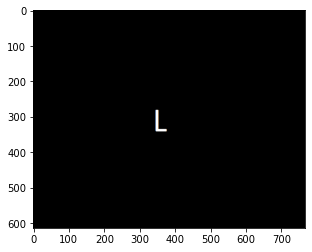

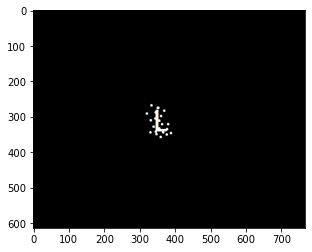

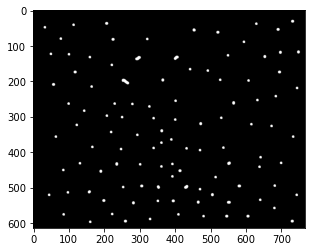

In [4]:
plt.imshow(img_o_png)
plt.show()
plt.imshow(L_noise_png)
plt.show()
plt.imshow(pure_noise_png)
plt.show()

In [5]:
# biinarise
img_o = at.callum_binarise(original_L_file)
L_noise = at.callum_binarise(L_noise_file)
pure_noise = at.callum_binarise(pure_noise_file)

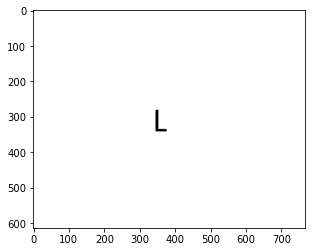

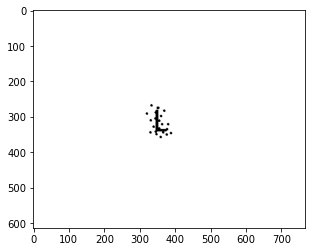

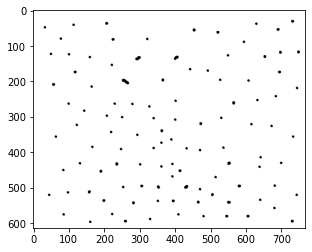

In [6]:
plt.imshow(img_o, cmap='gray')
plt.show()
plt.imshow(L_noise, cmap='gray')
plt.show()
plt.imshow(pure_noise, cmap='gray')
plt.show()

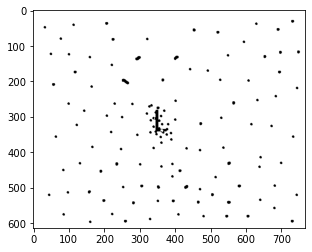

In [7]:
img_n = at.get_difference(L_noise, pure_noise)
plt.imshow(img_n, cmap='gray')
plt.show()

In [8]:
results = at.get_error_breakdown(img_o, img_n, at.noise_removal, {})

In [9]:
results.keys()

dict_keys(['total', 'pure', 'ltu', 'utl'])

Original image: 


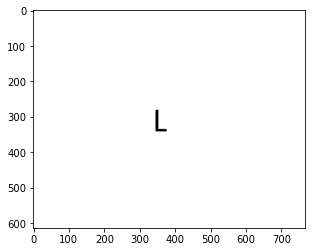

Total denoised image: 


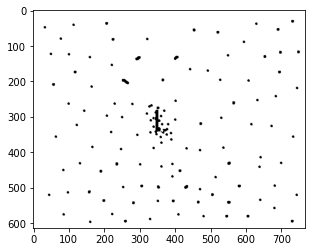

Total noise error:  (465650.0, 0.9874838830076005)


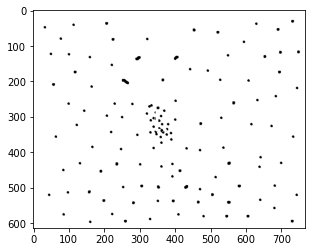

In [10]:
# TOTAL NOISE
print('Original image: ')
at.display_image(img_o)
print('Total denoised image: ')
at.display_image(results['total'][2])
print('Total noise error: ', results['total'][1])
at.display_image(results['total'][0]);


Noisy image: 


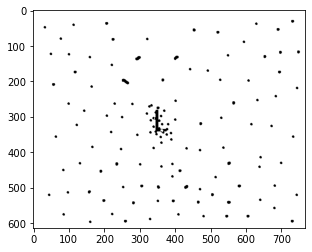

Pure noise:  (465623.0, 0.9874266252714441)


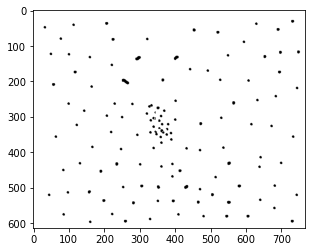

Pure noise denoised:  (465669.0, 0.9875241754885994)


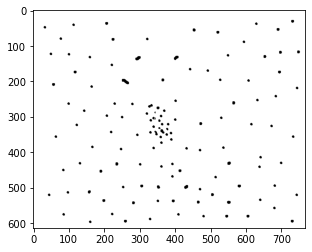

-9.879237065169022e-05


In [11]:
# PURE NOISE
print('Noisy image: ')
at.display_image(img_n)
print('Pure noise: ', results['pure'][1])
at.display_image(results['pure'][0])
print('Pure noise denoised: ', results['pure'][3])
at.display_image(results['pure'][2]);
print(1 - results['pure'][3][0] / results['pure'][1][0])

Total noisy denoised error:  (465650.0, 0.9874838830076005)


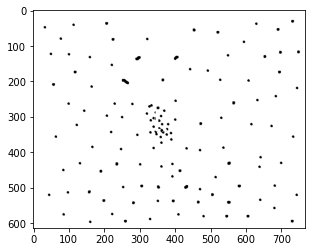

Pure noise denoised: (465669.0, 0.9875241754885994)


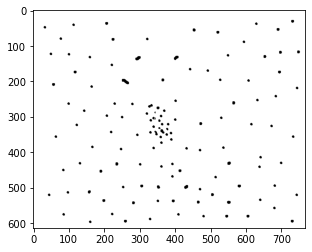

Letters and remaining noise:  (471521.0, 0.9999342596362649)


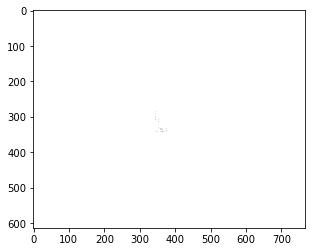

1.0126081821110275


In [13]:
# Letter to noise effect 1
total_stats = at.get_error(results['total'][0])
print('Total noisy denoised error: ', total_stats)
at.display_image(results['total'][0])
print('Pure noise denoised:', results['pure'][3])
at.display_image(results['pure'][2])
print('Letters and remaining noise: ', results['ltu'][3])
at.display_image(results['ltu'][2]);
print(results['ltu'][3][0] / total_stats[0])

Letters and remaining noise:  (471521.0, 0.9999342596362649)


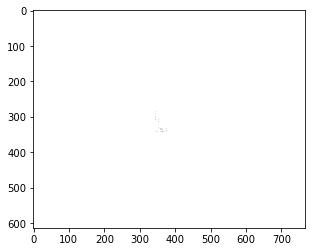

Original image: 


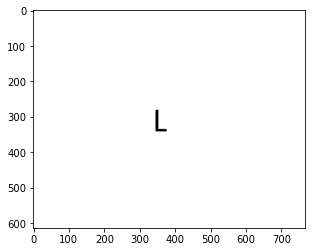

Letter to noise affect: (470888.0, 0.9985918838219326)


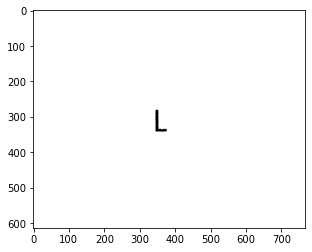

1.0112487920111672


In [14]:
# Letter to noise effect 2
print('Letters and remaining noise: ', results['ltu'][3])
at.display_image(results['ltu'][2]);
print('Original image: ')
at.display_image(img_o)
print('Letter to noise affect:', results['ltu'][1])
at.display_image(results['ltu'][0]);
print(results['ltu'][1][0] / total_stats[0])

Total denoised image:  (465097.0, 0.9863111597448425)


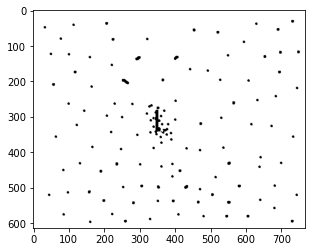

Letter to noise image: (470888.0, 0.9985918838219326)


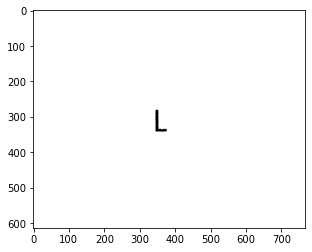

Letters after denoising:  (465669.0, 0.9875241754885994)


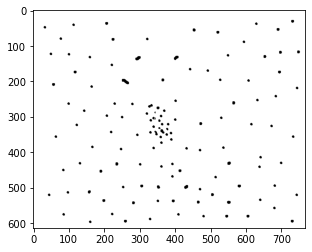

In [15]:
# Noise to letter effect 1
total_stats = at.get_error(results['total'][2])
print('Total denoised image: ', total_stats)
at.display_image(results['total'][2])
print('Letter to noise image:', results['ltu'][1])
at.display_image(results['ltu'][0])
print('Letters after denoising: ', results['utl'][3])
at.display_image(results['utl'][2]);

Letters after denoising:  (465669.0, 0.9875241754885994)


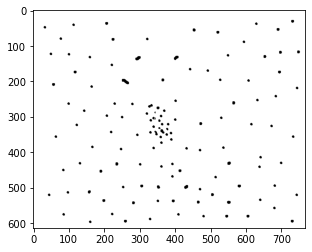

Original image: 


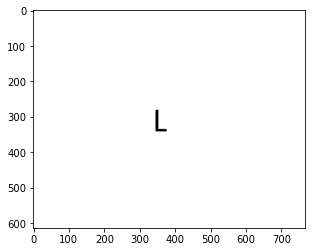

Noise to letter affect: (465108.0, 0.986334486970684)


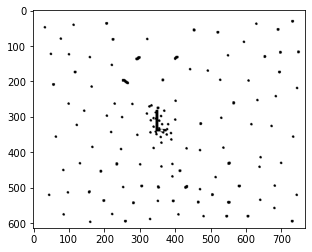

In [16]:
# Noise to letter effect 2
print('Letters after denoising: ', results['utl'][3])
at.display_image(results['utl'][2])
print('Original image: ')
at.display_image(img_o)
print('Noise to letter affect:', results['utl'][1])
at.display_image(results['utl'][0]);